In [3]:
with open('One.txt') as mytext:
    words1 = set(mytext.read().lower().split()) #readlines #read

In [4]:
words1

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [5]:
with open('Two.txt') as mytext:
    words2 = set(mytext.read().lower().split())

In [6]:
words2

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [15]:
alluniquewords = set()
alluniquewords.update(words1,words2)#.update(words2)

In [16]:
alluniquewords

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [17]:
#vectorize

In [18]:
full_vocab = dict()
i = 0

for word in alluniquewords:
    full_vocab[word] = i
    i+=1

In [19]:
full_vocab

{'popular': 0,
 'this': 1,
 'are': 2,
 'furry': 3,
 'is': 4,
 'water': 5,
 'sport': 6,
 'waves': 7,
 'fun': 8,
 'catching': 9,
 'dogs': 10,
 'canine': 11,
 'story': 12,
 'our': 13,
 'a': 14,
 'about': 15,
 'animals': 16,
 'pets': 17,
 'surfing': 18}

In [44]:
one_freq = [0]*len(full_vocab)
two_freq = [0]*len(full_vocab)
all_words = ['']*len(full_vocab)

In [45]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
two_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [48]:
with open('One.txt') as f:
    one_text = f.read().lower().split()

In [49]:
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind]+=1

In [50]:
one_freq

[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0]

In [51]:
with open('Two.txt') as f:
    two_text = f.read().lower().split()

In [52]:
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind]+=1

In [53]:
two_freq

[1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2]

In [55]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [56]:
all_words

['popular',
 'this',
 'are',
 'furry',
 'is',
 'water',
 'sport',
 'waves',
 'fun',
 'catching',
 'dogs',
 'canine',
 'story',
 'our',
 'a',
 'about',
 'animals',
 'pets',
 'surfing']

In [33]:
import pandas as pd

In [57]:
pd.DataFrame(data=[one_freq,two_freq],columns =all_words)

,popular,this,are,furry,is,water,sport,waves,fun,catching,dogs,canine,story,our,a,about,animals,pets,surfing
0,0,1,1,1,1,0,0,0,0,0,2,1,1,1,1,1,1,1,0
1,1,1,0,0,3,1,1,1,1,1,0,0,1,0,1,1,0,0,2


In [58]:
bow = pd.DataFrame(data=[one_freq,two_freq],columns =all_words)

In [59]:
#

In [64]:
text = ['This is a line',
       'This is another line',
       'Completely different line']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [70]:
cv = CountVectorizer(stop_words='english') #has stopword as a parameter

In [79]:
cv = CountVectorizer() #has stopword as a parameter

In [80]:
cv.fit_transform(text)

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [81]:
# transform from sparse to dense matrix

In [82]:
sparse_matrix = cv.fit_transform(text)

In [83]:
sparse_matrix.todense() # dont do this on large documents, takes too much space

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [84]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [85]:
tfidf = TfidfTransformer()

In [86]:
sparse_matrix

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [87]:
results = tfidf.fit_transform(sparse_matrix) #BOW --> TF-IDF

In [88]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [89]:
#to do count vectorisation and tfvectorization in 2 steps
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
tv = TfidfVectorizer()

In [92]:
tv_results = tv.fit_transform(text)

In [93]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [99]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

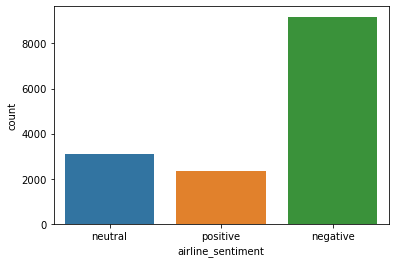

In [102]:
sns.countplot(data=df,x='airline_sentiment')

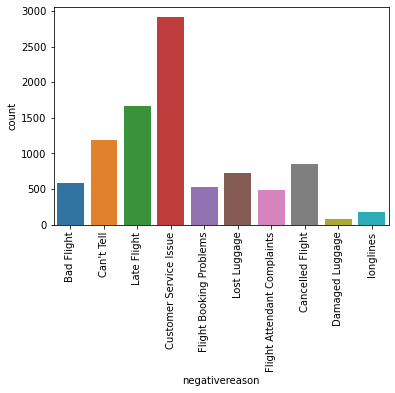

In [105]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline', ylabel='count'>

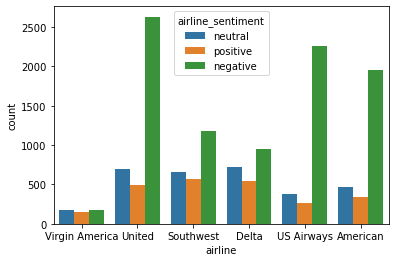

In [106]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [107]:
data = df[['airline_sentiment','text']]

In [108]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [109]:
X = data['text']

In [110]:
y = data['airline_sentiment']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tfidf = TfidfVectorizer(stop_words='english')

In [117]:
tfidf.fit(X_train) #only fit or scale to traiing data

TfidfVectorizer(stop_words='english')

In [118]:
X_train_tfidf = tfidf.transform(X_train) #transform train and test data

In [119]:
X_test_tfidf = tfidf.transform(X_test)

In [120]:
X_train_tfidf

<9808x11777 sparse matrix of type '<class 'numpy.float64'>'
	with 89412 stored elements in Compressed Sparse Row format>

In [121]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [124]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_tfidf,y_train)

LogisticRegression()

In [125]:
from sklearn.svm import SVC,LinearSVC
svc = SVC()
svc.fit(X_train_tfidf,y_train)

SVC()

In [126]:
linearsvc = LinearSVC()
linearsvc.fit(X_train_tfidf,y_train)

LinearSVC()

In [127]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [128]:
def report (model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      3085
     neutral       0.75      0.14      0.23       984
    positive       0.92      0.17      0.29       763

    accuracy                           0.69      4832
   macro avg       0.78      0.43      0.44      4832
weighted avg       0.73      0.69      0.61      4832



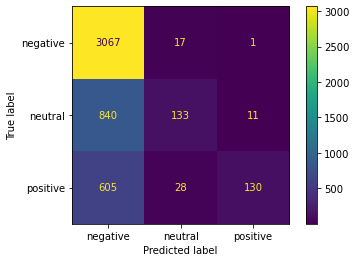

In [129]:
report(nb)

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      3085
     neutral       0.64      0.48      0.55       984
    positive       0.80      0.59      0.68       763

    accuracy                           0.79      4832
   macro avg       0.75      0.67      0.70      4832
weighted avg       0.78      0.79      0.77      4832



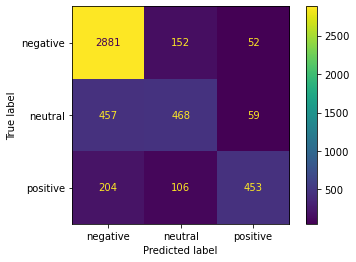

In [130]:
report(log)

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      3085
     neutral       0.69      0.40      0.51       984
    positive       0.81      0.60      0.69       763

    accuracy                           0.78      4832
   macro avg       0.76      0.65      0.69      4832
weighted avg       0.77      0.78      0.76      4832



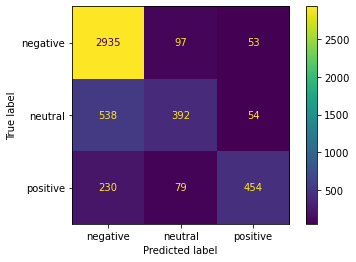

In [131]:
report(svc)

              precision    recall  f1-score   support

    negative       0.83      0.90      0.87      3085
     neutral       0.61      0.51      0.56       984
    positive       0.75      0.65      0.70       763

    accuracy                           0.78      4832
   macro avg       0.73      0.69      0.71      4832
weighted avg       0.77      0.78      0.78      4832



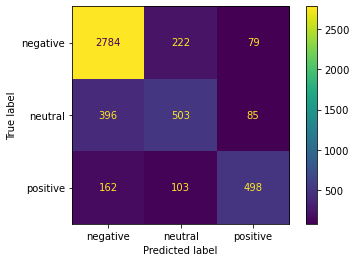

In [132]:
report(linearsvc)

In [133]:
from sklearn.pipeline import Pipeline

In [134]:
pipe = Pipeline([('tfidr',TfidfVectorizer()),('svc',LinearSVC())])

In [135]:
pipe.fit(X,y)

Pipeline(steps=[('tfidr', TfidfVectorizer()), ('svc', LinearSVC())])

In [138]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)